In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\8 PCA\wine.csv")

In [3]:
df=data.iloc[:,1:]

In [4]:
df.shape

(178, 13)

In [5]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
corr=df.corr()

<AxesSubplot:>

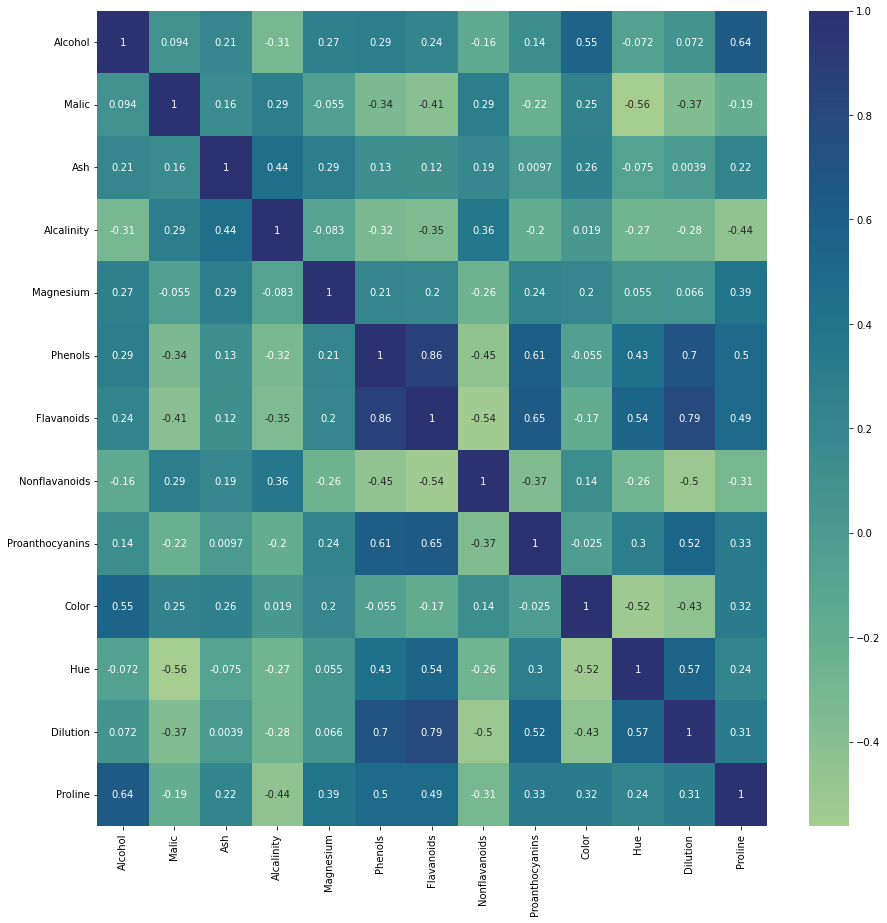

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="crest")

### Dimention Reduction with PCA

In [9]:
df=df.values

In [10]:
from sklearn.preprocessing import scale

In [11]:
df_norm=scale(df)

In [12]:
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(df_norm)

In [17]:
pc=range(1,pca.n_components_+1)

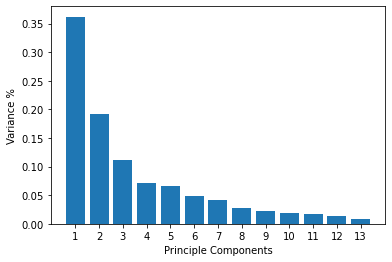

In [23]:
plt.bar(pc,pca.explained_variance_ratio_)
plt.xlabel("Principle Components")
plt.ylabel("Variance %")
plt.xticks(pc)
plt.show()

In [25]:
PCA_components=pd.DataFrame(pca_values)

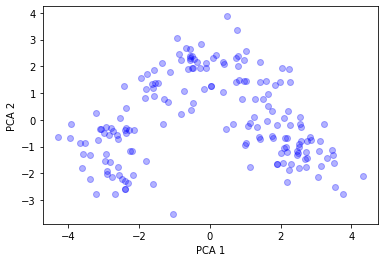

In [31]:
plt.scatter(PCA_components[0],PCA_components[1],alpha=.3,color="blue")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [32]:
from sklearn.cluster import KMeans

In [38]:
wcss=[]

for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_transform(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


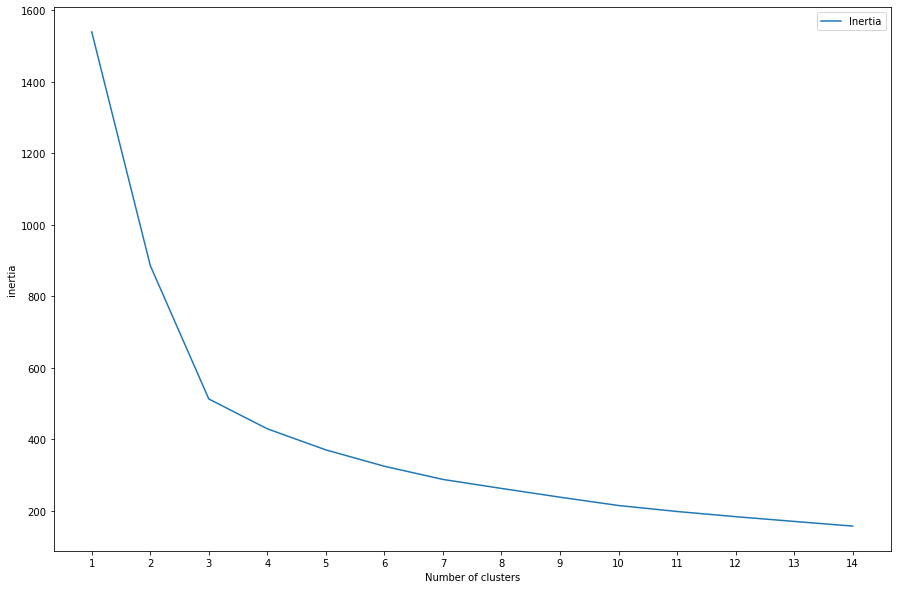

In [43]:
plt.figure(figsize=(15,10))
plt.plot(range(1,15),wcss,label="Inertia")
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.xticks(range(1,15))
plt.show()

In [45]:
model=KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:3])

KMeans(n_clusters=3)

In [49]:
label=model.fit_predict(PCA_components.iloc[:,:3])

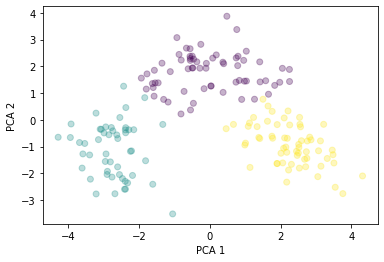

In [50]:
plt.scatter(PCA_components[0],PCA_components[1],alpha=.3,c=label)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [51]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Heirarchial Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
import scipy.cluster.hierarchy as sch

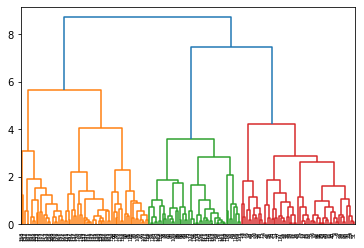

In [58]:
Dendrogram=sch.dendrogram(sch.linkage(PCA_components.iloc[:,:2],method="complete",metric="euclidean"))

In [59]:
model2=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [60]:
h_cluster=model2.fit(PCA_components.iloc[:,:2])

In [61]:
label2=model2.labels_

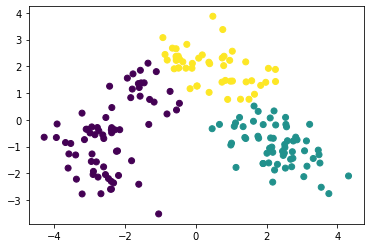

In [64]:
plt.scatter(PCA_components[0],PCA_components[1],c=label2)